## 12_PieChart, BoxPlot, ScatterPlot, BubblePlot    ##Saikiran Dasari IBM (DV)

## The same Datset!

### Exploring Datasets with pandas and Matplotlib

**Toolkits:** The course heavily relies on pandas and Numpy for data wrangling, analysis, and visualization. The primary plotting library we will explore in the course is Matplotlib.

>**Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website.**

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this lab, we will focus on the Canadian Immigration data.

In [1]:
#### Downloading and Prepping Data

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [7]:
# Download the dataset and read it into a pandas dataframe.

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Data downloaded and read into a dataframe!
Let's take a look at the first five items in our dataset.

In [8]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [9]:
import warnings
warnings.filterwarnings("ignore")

##### -----------------------------------------------------------------------------------------------------------
**Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to Introduction to Matplotlib and Line Plots and Area Plots, Histograms, and Bar Plots for a detailed description of this preprocessing.**

In [10]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))
print(df_can.columns)

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')
data dimensions: (195, 38)


In [15]:
df_can[['Continent']] ##These are all the continents

,Continent
Country,
Afghanistan,Asia
Albania,Europe
Algeria,Africa
American Samoa,Oceania
Andorra,Europe
...,...
Viet Nam,Asia
Western Sahara,Africa
Yemen,Asia


In [20]:
df_can['Continent'].unique()  #And there are 6 Unique Continents out of 195 rows!

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

## -> Visualizing Data using Matplotlib

Import Matplotlib.

In [26]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.1


# 1) PIE Chart

A pie chart is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

**Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.**

>**Step 1: Gather data.**

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

1.**Split:** Splitting the data into groups based on some criteria.
    
2.**Apply:** Applying a function to each group independently:

.sum()

.count()

.mean() 

.std()

.aggregate()

.apply()
.etc..

3.**Combine:** Combining the results into a data structure.

![title](PieChartExample.png)  ##need to be MarkDown!

In [21]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum() #axis=0 is Column wise

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


>**Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:**

autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.

startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.

shadow - Draws a shadow beneath the pie (to give a 3D feel).

In [24]:
df_continents['Total']

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

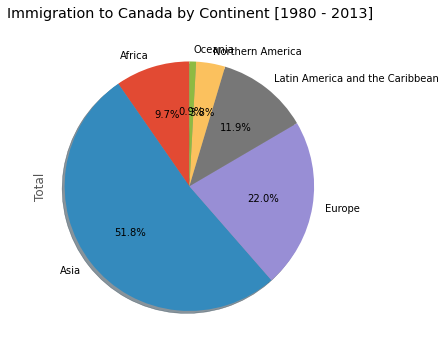

In [27]:
# autopct create %, start angle represent starting point
#Here, Function is plot, and Parameter = kind, with value = "pie"

df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

-Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().

-Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.

-Pass in a custom set of colors for continents by passing in colors parameter.

-Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.

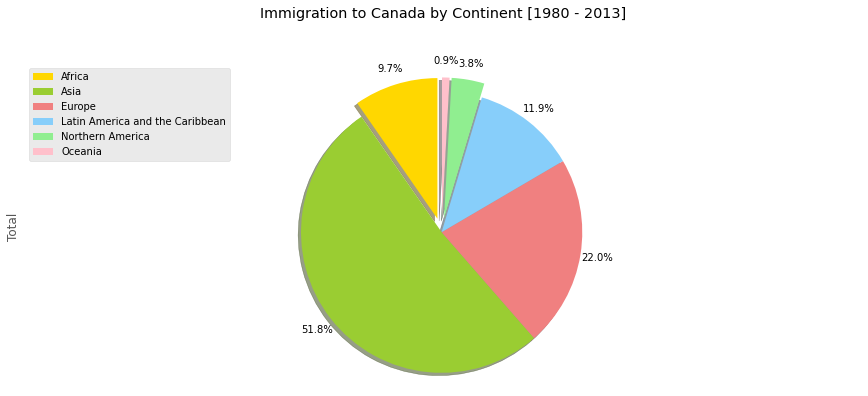

In [29]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] #ratio for each continent with which to offset each wedge. 0.1 means 

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

------------------------------------------------------------------
**Another Question:** 

Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note:** You might need to play with the explore values in order to fix any overlapping slice values.

In [30]:
### Answer:
# get the data
df_2013=df_can[['Continent','2013']]
df_continent_2013=df_2013.groupby('Continent', axis=0).sum()
df_continent_2013

,2013
Continent,
Africa,38543
Asia,155075
Europe,28691
Latin America and the Caribbean,24950
Northern America,8503
Oceania,1775


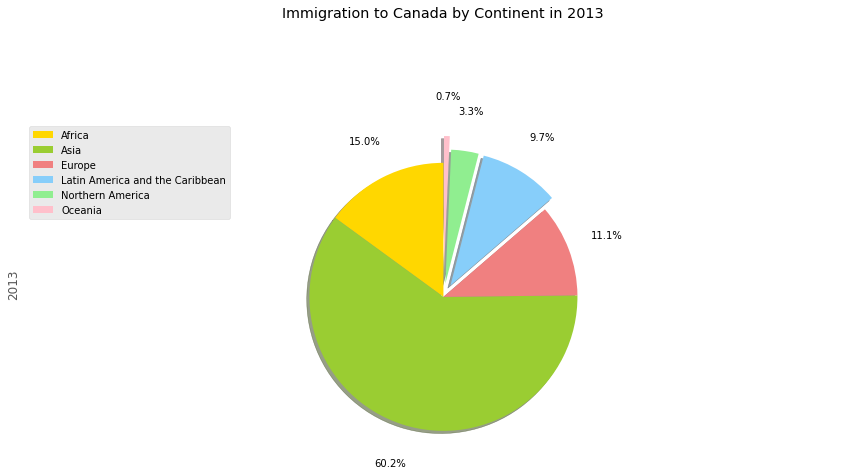

In [31]:
colors_list_2013 = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list_2013 = [0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge. 
                                            # 0.1 means that corresponding slice will jump out
df_continent_2013['2013'].plot(kind='pie',
                      figsize=(15,6),
                      autopct='%1.1f%%',
                      startangle=90,
                       shadow=True,
                       labels=None,
                       pctdistance=1.3,
                       colors=colors_list_2013,
                       explode=explode_list_2013
                      )
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.3) 
plt.axis('equal')

# add legend
plt.legend(labels=df_continent_2013.index, loc='upper left') 

plt.show()

# 2) Box Plots

A box plot is a way of statistically representing the distribution of the data through five main dimensions:

**Function = plot, and Parameter = kind, with value = "box"**

**Minimun:** Smallest number in the dataset.
    
**First quartile:** Middle number between the minimum and the median.
    
**Median(Second quartile):** Middle number of the (sorted) dataset.
    
**Third quartile:** Middle number between median and maximum.
    
**Maximum:** Highest number in the dataset.

![title](3Boxplot.png)

To make a box plot, we can use kind=box in plot method invoked on a pandas series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

**Step 1:** 

Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the dataframe.describe() method to view the percentiles.

In [32]:
# to get a dataframe, place extra square brackets around 'Japan'.

df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


**Step 2:** Plot by passing in kind='box'.

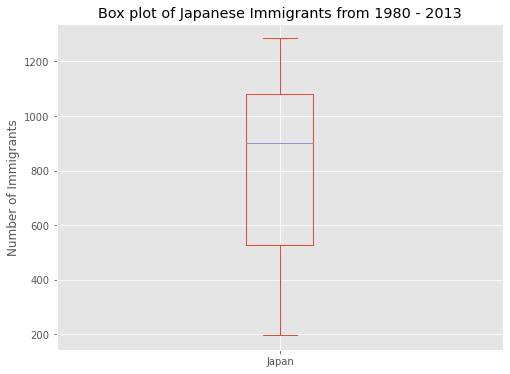

In [34]:
#Here, Function is plot, and Parameter = kind, with value = "box"

df_japan.plot(kind = 'box', figsize=(8, 6)) #Here, Function is plot, and Parameter = kind, with value = "box"

plt.title("Box plot of Japanese Immigrants from 1980 - 2013")
plt.ylabel("Number of Immigrants")

plt.show()

We can immediately make a few key observations from the plot above:

> 1.The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).

> 2)25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).

> 3)75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the **describe() method** on the dataframe.

In [35]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyize these two countries further using box plots.

**Another Question:** 

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

**Step 1:** 

Get the dataset for China and India and call the dataframe df_CI.

In [36]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [37]:
## Obtaining 2 df from China and India and Transpoing!

df_CI = df_can.loc[['China','India'], years].transpose()
df_CI

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


Let's view the percentages associated with both countries using the describe() method.

In [39]:
### Answer:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


**Step 2:** 

**Plot data.**

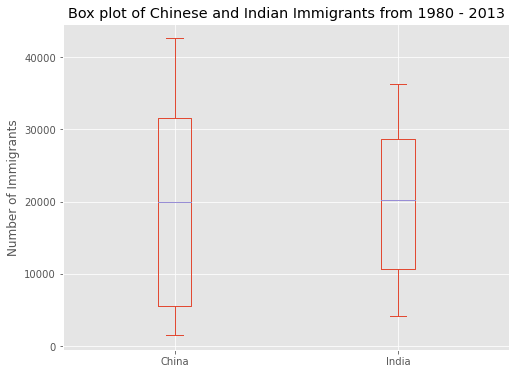

In [40]:
#Here, Function is plot, and Parameter = kind, with value = "box"
df_CI.plot(kind = 'box', figsize=(8, 6))

plt.title("Box plot of Chinese and Indian Immigrants from 1980 - 2013")
plt.ylabel("Number of Immigrants")

plt.show()

In [41]:
### Answer:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


We can observe that, while both countries have around the same median immigrant population (~20,000), China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

**-> HORIZONTAL BOX Plot**:

If you prefer to create horizontal box plots, you can **pass the vert parameter in the plot function and assign it to False**. 

You can also specify a different color in case you are not a big fan of the default red color.

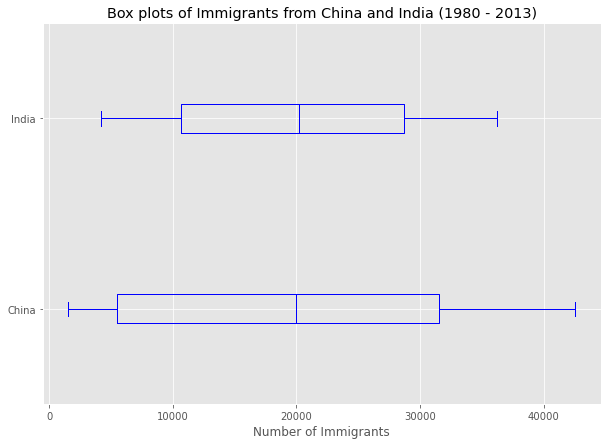

In [42]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False) #Here, Function is plot, and Parameter = kind, with value = "box"


plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

**Step 1:** Get the dataset. Get the top 15 countries based on Total immigrant population. **Name the dataframe df_top15**.

In [43]:
### Answer:

df_top15 = df_can.sort_values(by='Total', ascending=False).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


**Step 2:** 

Create a new dataframe which contains the aggregate for each decade. One way to do that:

>Create a list of all years in decades 80's, 90's, and 00's.

>Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.

>Merge the three series into a new data frame. Call your dataframe new_df.

In [44]:
### Answer:

# Create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) #1990 is not included in the range
years_90s = list(map(str, range(1990, 2000))) # 2000 is not included in the range
years_00s = list(map(str, range(2000, 2010))) # 2010 is not included in the range


# Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
df_1980s=df_top15.loc[:,years_80s].sum(axis=1)
df_1990s=df_top15.loc[:,years_90s].sum(axis=1)
df_2000s=df_top15.loc[:,years_00s].sum(axis=1)
#print(df_1980s)


# Merge the three series into a new data frame. Call your dataframe **new_df**.
new_df=pd.DataFrame({
    '1980s':df_1980s,
    '1990s':df_1990s,
    '2000s':df_2000s
})
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


Let's learn more about the statistics associated with the dataframe using the describe() method.

In [45]:
### Answer:

new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


---------------
**Step 3:** 

**Plot the box plots**.

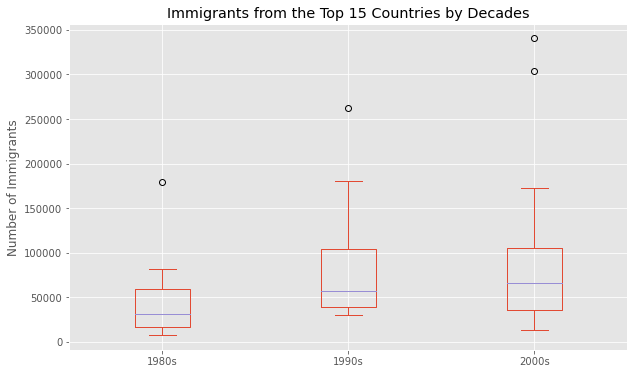

In [46]:
### Answer:
#Here, Function is plot, and Parameter = kind, with value = "box"
new_df.plot(kind='box', figsize=(10,6))


plt.title('Immigrants from the Top 15 Countries by Decades')
plt.ylabel('Number of Immigrants')
plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:
    
>larger than Q3 by at least 1.5 times the interquartile range (IQR, the first quartile subtracted from the third quartile), or,

>smaller than Q1 by at least 1.5 times the IQR.

**Let's look at decade 2000s as an example:  new_df.describe()**

         2000s

**min**	    = 13629.000000

**25%**	    = 36101.500000

**50%**	    = 65794.000000

**75%**	    = 105505.500000

**max**	    = 340385.000000

>**Q1 (25%)** = 36,101.5

>**Q3 (75%)** = 105,505.5

>**IQR = Q3 - Q1** = 69,404

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

>**Outlier > 105,505.5 + (1.5 * 69,404)**
>Outlier > 209,611.5

In [48]:
# let's check how many entries fall above the outlier threshold i.e 209,611.5

new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


**China and India are both considered as outliers since their population for the decade exceeds 209,611.5**.

The box plot is an advanced visualizaiton tool, and there are many options and customizations that exceed the scope of this lab. 

Please refer to Matplotlib documentation{http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot} on box plots for more information.

# 3) SCATTER Plots

A scatter plot (2D) is a useful method of comparing variables against each other. 

**Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph.**

While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. 

The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

**Question**: Using a scatter plot, let's visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.

**Step 1:** 

Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

In [49]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0)) #Summing all the Countries Immigrants for the years 1980 - 2013.

# change the above df of years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [50]:
# Reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


**Step 2:**
    
Plot the data. In Matplotlib, we can create a scatter plot set by passing in kind='scatter' as plot argument. We will also need to pass in x and y keywords to specify the columns that go on the x- and the y-axis.

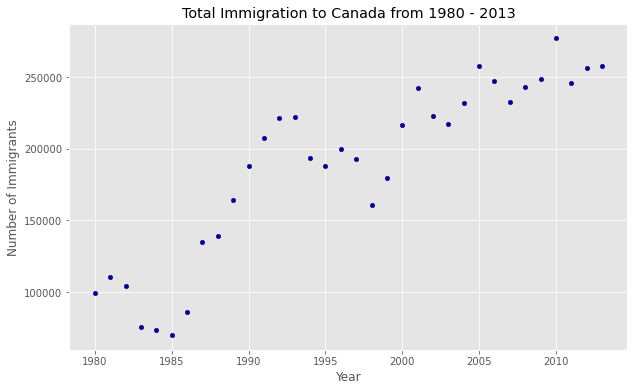

In [51]:
#Here, Function is plot, and Parameter = kind, with value = "scatter"

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Notice how the scatter plot does not connect the datapoints together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. 
    
We can mathematically analyze this upward trend using a regression line (line of best fit).

**So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.**

**Step 1:**
    
Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

>x: x-coordinates of the data.

>y: y-coordinates of the data.

>deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [52]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis

fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

**The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a*x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07]** with the the slope in position 0 and intercept in position 1.

**Step 2:** 

Plot the regression line on the scatter plot.

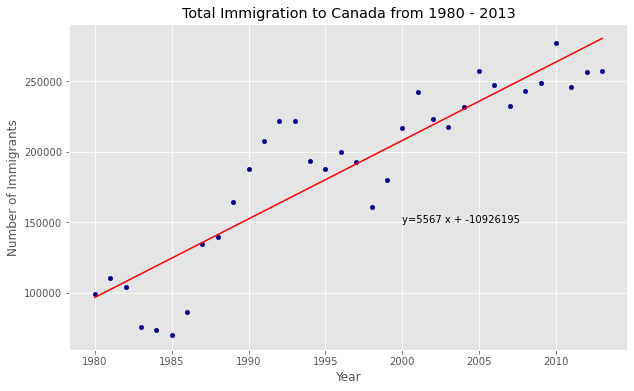

'No. Immigrants = 5567 * Year + -10926195'

In [53]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

--------------------------------------------------------------------
Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

No. Immigrants = 5567 * Year - 10926195

No. Immigrants = 5567 * 2015 - 10926195

No. Immigrants = 291,310

When compared to the actuals from Citizenship and Immigration Canada's (CIC) 2016 Annual Report, we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

**Another Question:** 

**Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?**

**Step 1: Get the data:**

1.Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.

2.Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.

3.Reset the index in place.

4.Rename the columns to year and total.

5.Display the resulting dataframe.

In [78]:
### Answer:

# Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
df_countries = df_can.loc[['Denmark','Norway','Sweden'],years]

#Sum the immigration numbers across all three countries for each year and turn the result into a dataframe.
## Name this new dataframe df_total
df_total = pd.DataFrame(df_countries.sum(axis=0)) #sum along the columns
#print(df_total)

# change the years to type int prior Resetting the index!(useful for regression later on.. )
df_total.index = map(int, df_total.index)
# Reset the index in place.
df_total.reset_index(inplace=True)

# Rename columns
df_total.columns = ['year', 'total']
df_total

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


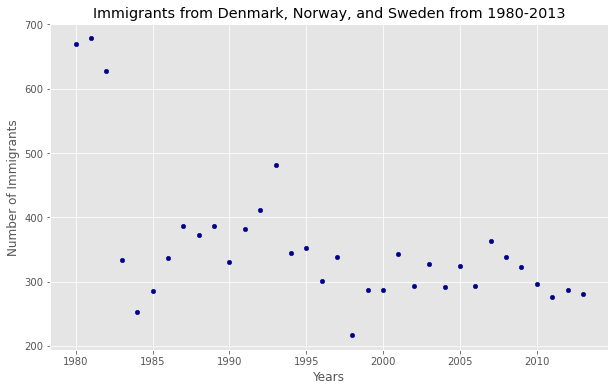

In [76]:
### Answer:

df_total.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title('Immigrants from Denmark, Norway, and Sweden from 1980-2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

# 4) BUBBLE Plots

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). 

The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. 

In maplotlib, we can pass in an array or scalar to the keyword s to plot(), that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

**Step 1:**
    
Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and bring it in the dataframe.

In [81]:
# A) Transpose the dataframe with 'years' 
df_can_t = df_can[years].transpose() # transposed dataframe
print(df_can_t)

Country  Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
1980              16        1       80               0        0       1   
1981              39        0       67               1        0       3   
1982              39        0       71               0        0       6   
1983              47        0       69               0        0       6   
1984              71        0       63               0        0       4   
1985             340        0       44               0        0       3   
1986             496        1       69               0        2       5   
1987             741        2      132               1        0       5   
1988             828        2      242               0        0      11   
1989            1076        3      434               1        0       6   
1990            1028        3      491               2        3       8   
1991            1378       21      872               0        0      23   
1992            1170     

In [82]:
# B) Cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)
print(df_can_t.index)


Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')


In [86]:
# C) let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'
df_can_t.head(4)

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114
1982,39,0,71,0,0,6,0,626,0,484,...,9074,146,0,0,174,2162,0,1,11,102
1983,47,0,69,0,0,6,0,241,0,317,...,7100,105,0,0,124,3404,0,6,7,44


In [87]:
# D) Reset Index to bring the Year in as a column
df_can_t.reset_index(inplace=True)
# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [103]:
# Compute Number of columns
cols = len(df_can_t.axes[1])  #Here axes is 1 that means it is Column! you can change to 0 to see total rows in df
cols
# len(df_can_t.columns)

196

In [106]:
# To see all the dataframes column names in a list
# print(df_can_t.columns.tolist())

**Step 2:** 
    
Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0,1]. The general formula is:

![title](12_BubblePlot(FeatureScalingFormula).png)

where X is an original value, X' is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.

In [108]:
# Normalize Brazil data  (Feature Scaling: 0 to 1)

norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
print(norm_brazil)

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())
print(norm_argentina)

0     0.032820
1     0.036467
2     0.025122
3     0.003647
4     0.006078
5     0.000000
6     0.030389
7     0.046191
8     0.106969
9     0.210697
10    0.210697
11    0.302674
12    0.379254
13    0.298217
14    0.176661
15    0.179092
16    0.184765
17    0.186791
18    0.162480
19    0.200972
20    0.289708
21    0.290519
22    0.249190
23    0.287277
24    0.318882
25    0.339951
26    0.425851
27    0.654781
28    0.813614
29    0.963938
30    1.000000
31    0.558347
32    0.612642
33    0.641815
Name: Brazil, dtype: float64
0     0.111039
1     0.148483
2     0.277598
3     0.029051
4     0.026469
5     0.000000
6     0.010975
7     0.208522
8     0.114913
9     0.220788
10    0.311168
11    0.366043
12    0.533893
13    0.533247
14    0.109748
15    0.118786
16    0.129116
17    0.125888
18    0.098773
19    0.078760
20    0.149128
21    0.283409
22    0.431892
23    1.000000
24    0.900581
25    0.617818
26    0.420271
27    0.273725
28    0.222079
29    0.174952
30    0.169

**Step 3: Plot the data.**

>To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the ax parameter.

-> We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
>Multiply weights by 2000 to scale it up on the graph, and,

>Add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

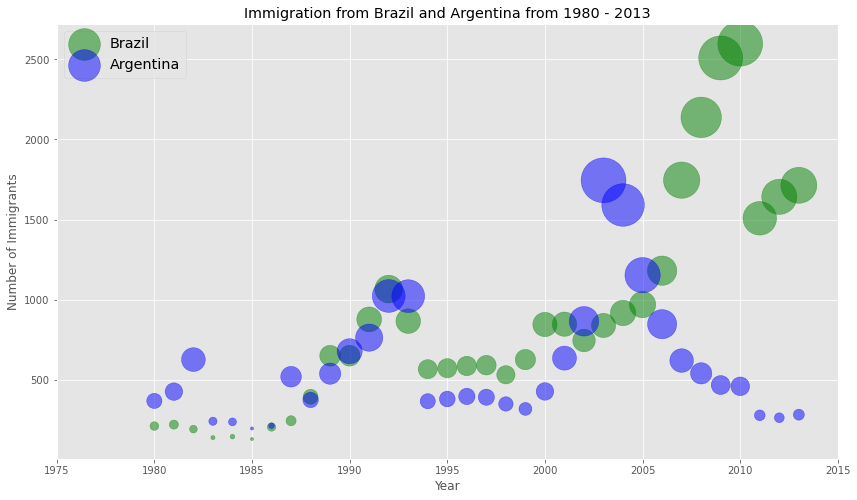

In [109]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

**The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.**

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

--------------------------------------------------------------------------
**Another Question:**

Previously in this lab, we created box plots to compare immigration from China and India to Canada. 

Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

**Step 1: Normalize the data pertaining to China and India.**

In [110]:
### type your answer here (Feature Scaling China and India : 0 to 1)
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

In [111]:
norm_india

0     0.145911
1     0.139348
2     0.123004
3     0.097722
4     0.046658
5     0.000000
6     0.091847
7     0.186818
8     0.228476
9     0.191631
10    0.244695
11    0.297603
12    0.295697
13    0.540173
14    0.450295
15    0.446201
16    0.614019
17    0.564299
18    0.407200
19    0.461358
20    0.761305
21    0.844151
22    0.864965
23    0.717022
24    0.750773
25    1.000000
26    0.926185
27    0.766618
28    0.751586
29    0.788931
30    0.938279
31    0.728085
32    0.835089
33    0.902403
Name: India, dtype: float64

**Step 2: Generate the bubble plots.**

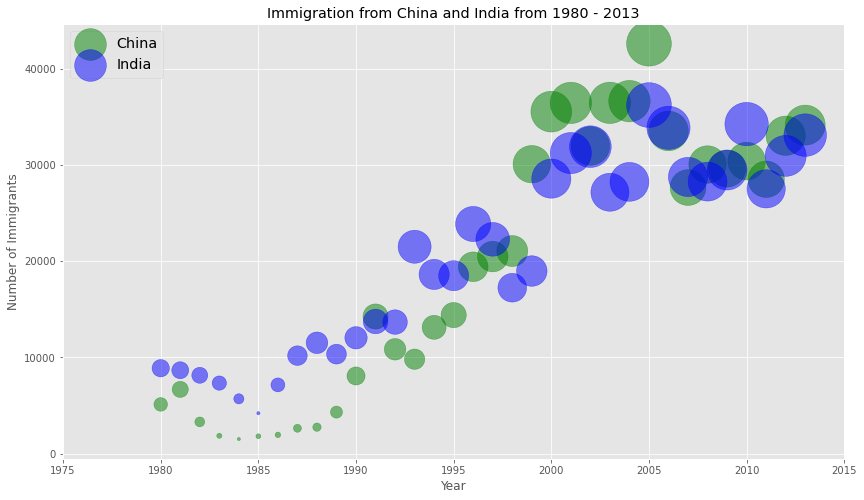

In [112]:
### type your answer here

# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')